In [1]:
import os
import csv
import numpy as np

from gensim.models import KeyedVectors
from nltk import word_tokenize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
def load_embeddings_file(file_name, embedding_type, lower):
    """TODO"""
    if not os.path.isfile(file_name):
        raise Exception("{} does not exist".format(file_name))
    words = None
    if embedding_type == "word2vec":
        model = KeyedVectors.load_word2vec_format(
            file_name, binary=True, unicode_errors="ignore"
        )
        words = model.index2entity
    else:
        raise Exception("Unknown Embedding Type")

    if lower:
        vectors = {word.lower(): model[word] for word in words}
    else:
        vectors = {word: model[word] for word in words}
    return vectors

def read_library_dataset(file_name):
    methods = []
    with open(file_name) as target:
        reader = csv.reader(target)
        for row in reader:
            description = row[1]
            if ("class-description" not in description) and (not description.startswith("http")):
                if ')' in description:
                    splitted = description.split(")")
                    fname, definition = splitted[0]+")", splitted[1]
                    definition = definition.strip()
                    words = [token for token in word_tokenize(definition)]
                    if definition:
                        methods.append({"name" : fname, "words" : words})
    return methods


def sentence_embeddings(methods, embeddings):
    for m in methods:
        s_vectors = [embeddings[word] for word in m["words"] if word in embeddings ]
        m["embeddings"] = np.sum(s_vectors, axis=0)

In [ ]:
embeddings = load_embeddings_file("../../datasets/embeddings/GoogleNews-vectors-negative300.bin.gz", "word2vec", True)
methods = read_library_dataset("../../datasets/library-dataset.csv")
sentence_embeddings(methods, embeddings)


X = np.array(np.empty((len(methods),300)))
for idx, method in enumerate(methods): 
    X[idx] = method["embeddings"]



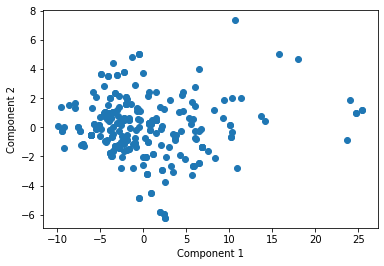

In [10]:
pca = PCA(n_components=2)
projected = pca.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig("../../output/visualizations/LibraryMethodsSimpleSemanticRepr.png")